In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


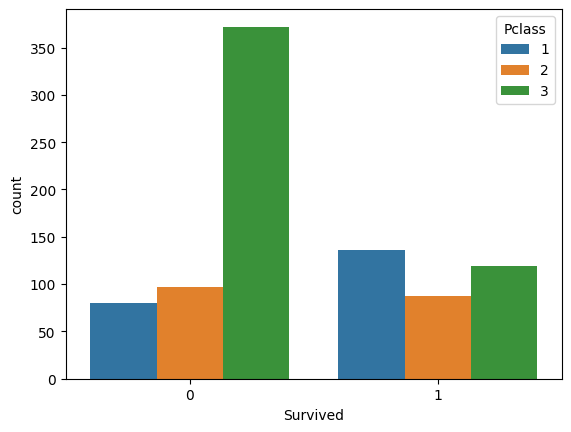

In [ ]:
sns.countplot(x=data['Survived'],hue=data['Pclass']);

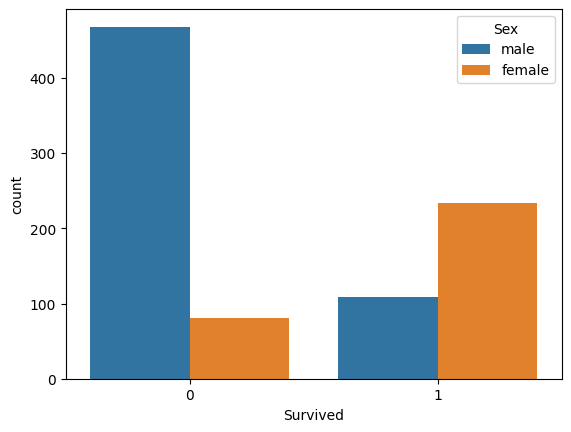

In [ ]:
sns.countplot(x=data['Survived'],hue=data['Sex']);

In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

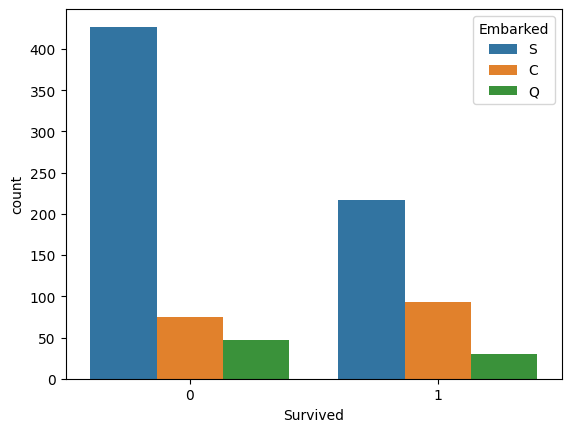

In [ ]:
sns.countplot(x=data['Survived'],hue=data['Embarked']);

In [ ]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
cols = ['PassengerId','Name','Ticket','Cabin','Fare']
data = data.drop(cols,axis=1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [ ]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
dtype: int64

In [ ]:
mean_age= np.round(data['Age'].mean(),2)
data['Age'] = data['Age'].fillna(mean_age)

In [ ]:
data = data.dropna()

In [ ]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [ ]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['Sex'] = encoder.fit_transform(data['Sex'])
data['Embarked'] = encoder.fit_transform(data['Embarked'])

In [ ]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,2
1,1,1,0,38.0,1,0,0
2,1,3,0,26.0,0,0,2
3,1,1,0,35.0,1,0,2
4,0,3,1,35.0,0,0,2


In [ ]:
y = np.array(data['Survived'])
x = np.array(data.drop(['Survived'],axis=1))

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=1,train_size=0.85)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression()

In [ ]:
xtest

array([[ 2. ,  0. , 36. ,  0. ,  0. ,  2. ],
       [ 2. ,  0. , 50. ,  0. ,  1. ,  2. ],
       [ 3. ,  1. , 48. ,  0. ,  0. ,  2. ],
       [ 3. ,  0. , 16. ,  0. ,  0. ,  1. ],
       [ 3. ,  1. , 14. ,  5. ,  2. ,  2. ],
       [ 1. ,  0. , 35. ,  1. ,  0. ,  2. ],
       [ 3. ,  0. , 18. ,  0. ,  0. ,  2. ],
       [ 3. ,  0. , 11. ,  4. ,  2. ,  2. ],
       [ 3. ,  1. , 17. ,  1. ,  1. ,  0. ],
       [ 3. ,  0. , 26. ,  0. ,  0. ,  2. ],
       [ 1. ,  1. , 54. ,  0. ,  0. ,  2. ],
       [ 3. ,  0. , 18. ,  0. ,  1. ,  0. ],
       [ 2. ,  1. , 29.7,  0. ,  0. ,  2. ],
       [ 2. ,  0. ,  4. ,  2. ,  1. ,  2. ],
       [ 3. ,  1. , 22. ,  0. ,  0. ,  2. ],
       [ 3. ,  0. , 22. ,  0. ,  0. ,  2. ],
       [ 3. ,  1. , 45.5,  0. ,  0. ,  0. ],
       [ 2. ,  0. , 40. ,  0. ,  0. ,  2. ],
       [ 1. ,  0. , 49. ,  0. ,  0. ,  2. ],
       [ 1. ,  1. , 28. ,  1. ,  0. ,  0. ],
       [ 3. ,  1. , 32. ,  0. ,  0. ,  2. ],
       [ 1. ,  1. , 27. ,  1. ,  0. ,  2. ],
       [ 2

In [ ]:
ypred = model.predict(xtest)
ypred

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0])

In [ ]:
ytest

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1])

In [ ]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(ytest,ypred)
ac

0.8134328358208955

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
for i in range(10000):
  xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=i,train_size=0.85)

  model = LogisticRegression()
  model.fit(xtrain,ytrain)
  from sklearn.metrics import accuracy_score
  ac = accuracy_score(ytest,ypred)
  ac

In [ ]:
# confusion matrix (square matrix)
#accuracy score(balance data), imbalance data (precision score(FP is important-cancer), recall score(FN is important-spam mail)  and f1 score(confusion- go for f1 score)
data['Survived'].value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [ ]:
from sklearn.metrics import *
print(precision_score(ytest,ypred))
print(recall_score(ytest,ypred))
f1_score(ytest,ypred)

0.375
0.39622641509433965


0.38532110091743116

In [ ]:
confusion_matrix(ytest,ypred)

array([[46, 35],
       [32, 21]])